# Imports 

In [ ]:
import pandas as pd
import numpy as np 
import time 
import datetime 
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.preprocessing import StandardScaler

# Reading Dataset 

In [ ]:
orig_df = pd.read_csv('/mnt/share/datasets/fala/content/delhi_weather_final.csv') 
df = orig_df.copy() 
print(f'Size of the dataset: {df.shape} \n')  
print() 
display(df.head(5))

# Cleaning the data 

### Renaming he columns 

In [ ]:
df.columns = ['Date' , 'Temperature', 'Pressure' , 'Humidity']

### Removing possible outliers

In [ ]:
df.describe()

In [ ]:
display(df.quantile([0 , 0.25 , 0.5 , 0.75 , 1] , axis = 0, numeric_only=True ))

In [ ]:
df.shape

In [ ]:
df = df[(df['Humidity'] >= 39) & (df['Humidity'] <= 78)]
df = df[(df['Pressure'] >= 1002.0) & (df['Pressure'] <= 1014.0)]
df = df[(df['Temperature'] >= 19.0) & (df['Temperature'] <= 32.0)]

In [ ]:
df.shape

In [ ]:
max_temp = np.max(df['Temperature'])
max_pres = np.max(df['Pressure'])
max_humid = np.max(df['Humidity'])

min_temp = np.min(df['Temperature'])
min_pres = np.min(df['Pressure'])
min_humid = np.min(df['Humidity'])

print(f'Max Temp : {max_temp}')
print(f'Max Pressure : {max_pres}')
print(f'Max Humidity : {max_humid}')

print(f'Min Temp : {min_temp}')
print(f'Min Pressure : {min_pres}')
print(f'Min Humidity : {min_humid}')

### Removing Missing values 

In [ ]:
df.isnull().sum()

In [ ]:
print('Dataframe shape : {}'.format(df.shape))

### Resetting index 

In [ ]:
idx = pd.date_range('1996-11-01 14:00:00', periods=19874 , freq='1h')

In [ ]:
df = df.set_index(idx)
df.index.name = 'Timestamp' 
date_column = df['Date'] 
df = df.drop(columns = ['Date'] , axis = 1)

In [ ]:
df.head()

In [ ]:
df_array = np.array(df) 
df_array

### Reducing size for faster computation

In [ ]:
df_array = df_array[:5000]
df_array.shape 

### Scaling features 

In [ ]:
scaler = StandardScaler() 
scaled_df_array = scaler.fit_transform(df_array)

In [ ]:
scaled_df_array[:5]

### Segregating feaures 

In [ ]:
  sha = scaled_df_array[:, 0].reshape((-1, 1))
  spa = scaled_df_array[:, 1].reshape((-1, 1))
  sta = scaled_df_array[:, 2].reshape((-1, 1))

  sha.shape , spa.shape , sta.shape 

# Preparing training and test set

### Preparing training set

In [ ]:
train_data_len = int(np.ceil(len(df_array)* 0.95))
train_data_len

In [ ]:
x_train = []
y_train_temp = [] 
y_train_humidity = [] 
y_train_pressure = [] 

for i in range(48 , train_data_len) : 
  temp1 = sha[i - 48 : i, 0] 
  temp2 = spa[i - 48 : i, 0] 
  temp3 = sta[i - 48 : i, 0] 
  temp4 = np.concatenate((temp1 , temp2 , temp3))

  x_train.append(temp4) 
  y_train_temp.append(sta[i, 0])
  y_train_humidity.append(sha[i, 0])
  y_train_pressure.append(spa[i, 0])

  if i <= 49 : 
    print(x_train , np.array(x_train).shape)
    print()
    print(y_train_temp , y_train_humidity, y_train_pressure)
    print()
   

In [ ]:
np.array(x_train).shape , np.array(y_train_humidity).shape, np.array(y_train_pressure).shape , np.array(y_train_temp).shape

In [ ]:
x_train = np.array(x_train).reshape((-1 , 144 , 1))
y_train_humidity = np.array(y_train_humidity)
y_train_pressure = np.array(y_train_pressure)
y_train_temp = np.array(y_train_temp)

### Preparing testing set

In [ ]:
test_data = sta[train_data_len - 48 : , :]
test_data.shape

In [ ]:
x_test = []

y_test_temp = sta[train_data_len : , :] 
y_test_humidity = sha[train_data_len : , :]
y_test_pressure = spa[train_data_len : , :]

for i in range (48 , len(test_data)):
  temp1 = sha[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp2 = spa[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp3 = sta[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]

  temp4 = np.concatenate((temp1 , temp2 , temp3))
  x_test.append(temp4)
  
  if  i<=49:
    print(x_test , np.array(x_test).shape)
    print()
    print(y_test_temp , y_test_humidity, y_test_pressure)
    print()
    

In [ ]:
x_test = np.array(x_test)

y_test_humidity = np.array(y_test_humidity)
y_test_pressure = np.array(y_test_pressure)
y_test_temp = np.array(y_test_temp)

In [ ]:
x_test.shape , y_test_humidity.shape , y_test_pressure.shape , y_test_temp.shape

In [ ]:
print(x_train.shape )
x_test.shape

# Creating model 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM  , Dense
from keras.callbacks import EarlyStopping

### Temperature model

#### RNN's

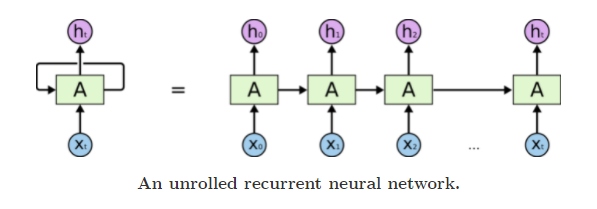

#### What are LSTM's

THE CORE IDEA 

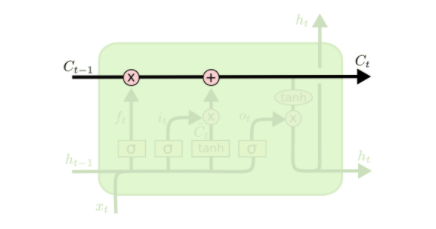

1) THE FORGET GATE 

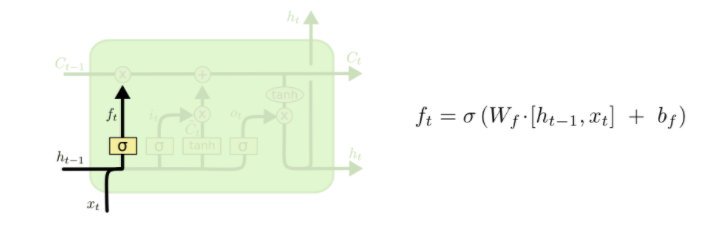

2) INPUT GATE 

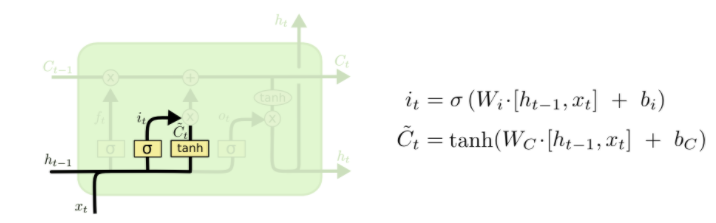

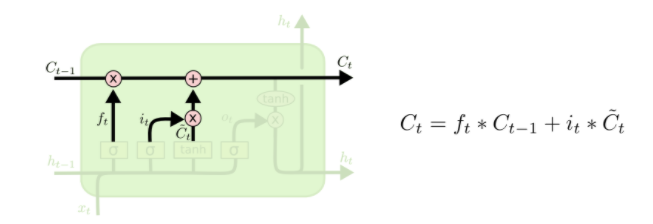

OUTPUT GATE 

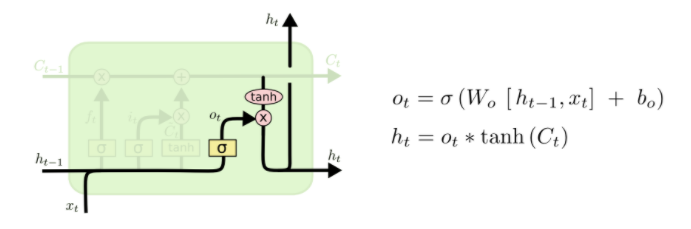#### Defining Architecure 

In [ ]:
temperature_model = Sequential()

In [ ]:
temperature_model.add(LSTM(128 , return_sequences = True , input_shape = (x_train.shape[1] , 1) ))
temperature_model.add(LSTM(128 , return_sequences = False))
temperature_model.add(Dense(64 , activation = "relu"))
temperature_model.add(Dense(1))
temperature_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(temperature_model , show_shapes = True )

### Compiling

Compiling with Adam optimizer because:- 

This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace.

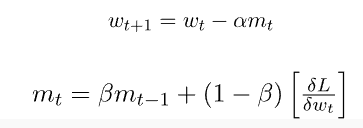

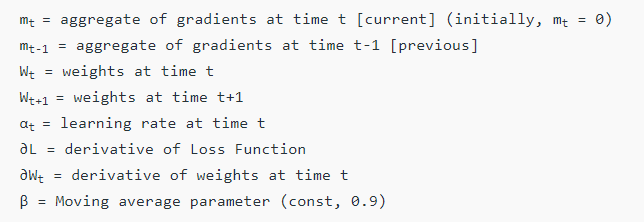

In [ ]:
temperature_model.compile(optimizer = "adam" , loss="mean_squared_error")
temperature_model

#### Training

In [ ]:
callbacks = EarlyStopping(
    patience = 5 , 
    restore_best_weights = True , 
    monitor = 'val_loss'
)

In [ ]:
history = temperature_model.fit(
    x_train , 
    y_train_temp , 
    batch_size = 256 , 
    epochs = 75 ,
    verbose = 1 , 
    validation_split = 0.2 , 
    callbacks = [callbacks]
)

In [ ]:
yp = temperature_model.predict(x_test)
print(yp[:5])

# z = np.zeros(800).reshape((400,2))
# yp = np.concatenate((yp_copy , z) , axis = 1)
# print()
# print(yp[:5])

# ypi = scaler.inverse_transform(yp)
# print()
# print(ypi[:5])


# ypn = ypi[: , 0]
# print()
# print(ypn[:5])

# rmse 
rmse = np.sqrt(np.mean((yp - y_test_temp)**2))
print(f'RMSE: {rmse}')

In [ ]:
plt.rcParams.update({'figure.figsize': (15,6)})
plt.plot(y_test_temp[:100])
plt.plot(yp[:100] , color = "red")